In [23]:
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sqlalchemy import create_engine

# Define connection parameters
host = 'localhost'
user = 'root'
password = 'sru@123'
database = 'farmersmarket'

# Establish connection
connection = mysql.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Create the SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

# Verify connection
if connection.is_connected():
    print("Connected to MySQL database!")


Connected to MySQL database!


In [27]:
#Create a cursor
cursor = connection.cursor()


In [29]:
# Execute the query
query = "SELECT * FROM farmersmarket;"
cursor.execute(query)

# Fetch all results from the cursor
result = cursor.fetchall()

# Create the DataFrame (use `result` instead of calling fetchall again)
mandi_data = pd.DataFrame(result, columns=[desc[0] for desc in cursor.description])

# Print the DataFrame
print(mandi_data)


                     state        district      market              commodity  \
0      Andaman and Nicobar   South Andaman  Port Blair             Amaranthus   
1      Andaman and Nicobar   South Andaman  Port Blair         Banana - Green   
2      Andaman and Nicobar   South Andaman  Port Blair  Bhindi(Ladies Finger)   
3      Andaman and Nicobar   South Andaman  Port Blair           Bitter gourd   
4      Andaman and Nicobar   South Andaman  Port Blair           Black pepper   
...                    ...             ...         ...                    ...   
15661          West Bengal  Uttar Dinajpur    Islampur                 Potato   
15662          West Bengal  Uttar Dinajpur    Islampur                   Rice   
15663          West Bengal  Uttar Dinajpur     Raiganj                   Jute   
15664          West Bengal  Uttar Dinajpur     Raiganj                   Rice   
15665          West Bengal  Uttar Dinajpur     Raiganj                  Wheat   

              variety arriv

In [31]:
while cursor.nextset():
    pass  # Skip unread results


In [33]:
print(mandi_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         15666 non-null  object 
 1   district      15666 non-null  object 
 2   market        15666 non-null  object 
 3   commodity     15666 non-null  object 
 4   variety       15666 non-null  object 
 5   arrival_date  15666 non-null  object 
 6   min_price     15666 non-null  float64
 7   max_price     15666 non-null  float64
 8   modal_price   15666 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.1+ MB
None


In [35]:
print(mandi_data[['min_price', 'max_price', 'modal_price']].describe())


           min_price      max_price    modal_price
count   15666.000000   15666.000000   15666.000000
mean     2456.230563    2855.890527    2698.865952
std      3451.836430    3916.501256    3694.123242
min         0.000000       0.000000       2.000000
25%       800.000000    1000.000000     950.000000
50%      1700.000000    1960.000000    1831.500000
75%      3200.000000    3700.000000    3500.000000
max    110000.000000  130000.000000  120000.000000


In [37]:
#Cleaning The Data 

# Check for missing values in each table.
print(mandi_data.isnull().sum())

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64


In [39]:
#Remove Duplicates

print(mandi_data.duplicated().sum())

mandi_data[mandi_data.duplicated(subset=["state", "district", "market", "commodity", "arrival_date"], keep=False)]


13430


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,2019-04-03,6000.0,8000.0,7000.0
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,2019-04-03,4500.0,5500.0,5000.0
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2019-04-03,6000.0,8000.0,7000.0
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,2019-04-03,6000.0,8000.0,7000.0
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,2019-04-03,110000.0,130000.0,120000.0
...,...,...,...,...,...,...,...,...,...
15661,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,2019-04-03,530.0,570.0,550.0
15662,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,2019-04-03,3550.0,3650.0,3600.0
15663,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,2019-04-03,4400.0,4600.0,4500.0
15664,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,2019-04-03,3450.0,3550.0,3500.0


In [41]:
mandi_data['arrival_date'] = pd.to_datetime(mandi_data['arrival_date'])

#arrival date:mm/dd/yyyy converted to arrival date:yyyy/mm/dd

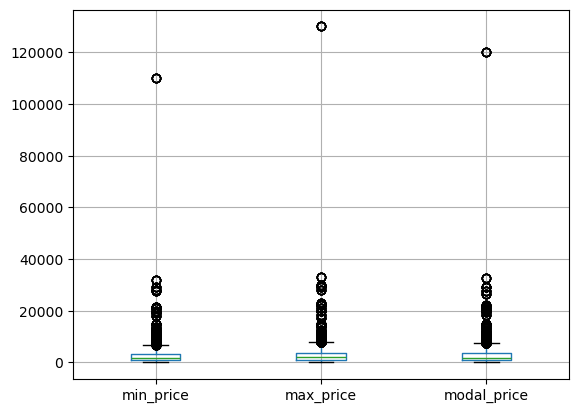

In [43]:
# Handle any outliers or inconsistencies.
import matplotlib.pyplot as plt

mandi_data[['min_price', 'max_price', 'modal_price']].boxplot()
plt.show()


In [45]:
#Exploratory Data Analysis (EDA) and Visualization:

In [47]:
# Convert the 'market' column values to uppercase
mandi_data['market'] = mandi_data['market'].str.upper()

# Convert the 'variety' column values to lowercase
mandi_data['variety'] = mandi_data['variety'].str.lower()

In [49]:
# Filter the mandi_data DataFrame to find rows where either the minimum price or maximum price is less than or equal to zero
print(mandi_data[(mandi_data['min_price'] <= 0) | (mandi_data['max_price'] <= 0)])


                  state       district               market  \
278    Himachal Pradesh         Kangra  KANGRA(JAISINGHPUR)   
279    Himachal Pradesh         Kangra  KANGRA(JAISINGHPUR)   
326    Himachal Pradesh         Kangra             PALAMPUR   
328    Himachal Pradesh         Kangra             PALAMPUR   
888             Manipur      Bishnupur            BISHENPUR   
...                 ...            ...                  ...   
15348     Uttar Pradesh  Muzaffarnagar              SHAHPUR   
15349     Uttar Pradesh  Muzaffarnagar              SHAHPUR   
15350     Uttar Pradesh  Muzaffarnagar              SHAHPUR   
15351     Uttar Pradesh  Muzaffarnagar              SHAHPUR   
15352     Uttar Pradesh  Muzaffarnagar              SHAHPUR   

                         commodity          variety arrival_date  min_price  \
278                        Raddish          raddish   2019-04-03        0.0   
279                        Spinach            other   2019-04-03     1400.0   
326   

In [51]:
#Total Number of commodities present.

total_commodities = mandi_data["commodity"].nunique()
print("Total Number of Commodities:", total_commodities)


Total Number of Commodities: 156


In [53]:
#1.Top 20 most expensive commodities.
# Ensure 'modal_price' is numeric
mandi_data["modal_price"] = pd.to_numeric(mandi_data["modal_price"], errors='coerce')

# Remove rows with NaN values in 'commodity' or 'modal_price'
mandi_data.dropna(subset=["commodity", "modal_price"], inplace=True)

# Get the top 20 expensive commodities
top_expensive = mandi_data.groupby("commodity")["modal_price"].max().nlargest(20)
print(top_expensive)
 


commodity
Black pepper                    120000.0
Pepper garbled                   32500.0
Ghee                             29000.0
Betal Leaves                     26500.0
Arecanut(Betelnut/Supari)        22250.0
Mashrooms                        20000.0
Coconut Oil                      18150.0
Dry Chillies                     15000.0
Sesamum(Sesame,Gingelly,Til)     14509.0
Rubber                           12350.0
Apple                            11000.0
Bengal Gram Dal (Chana Dal)      11000.0
Cauliflower                      11000.0
Gingelly Oil                     10649.0
Mustard Oil                      10530.0
Cashewnuts                       10500.0
Copra                            10300.0
Tamarind Fruit                   10100.0
Carrot                           10000.0
Bitter gourd                      9800.0
Name: modal_price, dtype: float64


C:\Users\srush\AppData\Local\Temp\ipykernel_12044\2151481877.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_commodities_south = top_commodities_south.groupby("state", group_keys=False).apply(


<Figure size 1200x400 with 0 Axes>

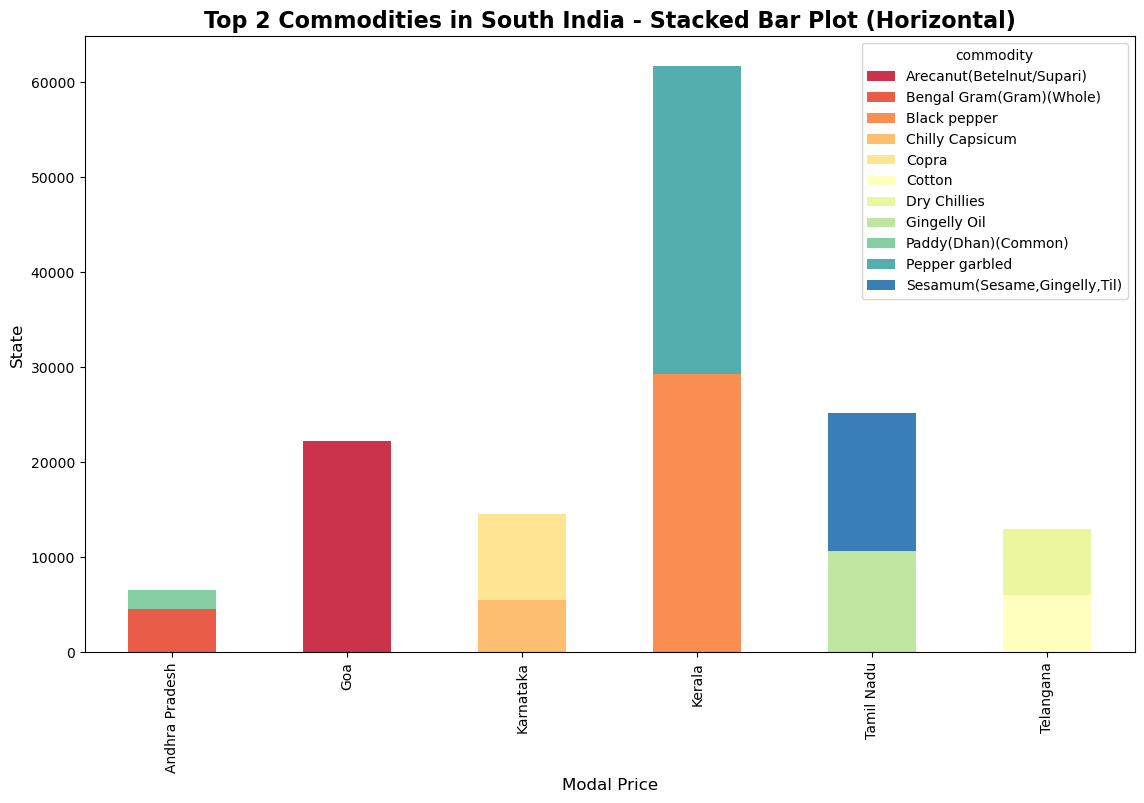

In [55]:
#2.Top 2 Commodities in South India

import matplotlib.pyplot as plt
import seaborn as sns

# Define the South Indian states
south_indian_states = ['Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Goa']

# Filter the data for South Indian states
south_indian_data = mandi_data[mandi_data['state'].isin(south_indian_states)]

# Group by 'state' and 'commodity', and get the max modal price
top_commodities_south = south_indian_data.groupby(["state", "commodity"])["modal_price"].max().reset_index()

# Get the top 5 commodities for each South Indian state
top_commodities_south = top_commodities_south.groupby("state", group_keys=False).apply(
    lambda x: x.nlargest(2, 'modal_price')
).reset_index(drop=True)

# Pivot the data for the stacked bar plot
pivot_data_south = top_commodities_south.pivot_table(
    values="modal_price", 
    index="state", 
    columns="commodity", 
    aggfunc="max", 
    fill_value=0
)

# Generate a color palette with distinct shades for each commodity
num_commodities = len(top_commodities_south['commodity'].unique())
colors = sns.color_palette("Spectral", num_commodities)  # Using shades of blue

# Plotting the horizontal stacked bar chart with the custom color palette
plt.figure(figsize=(12, 4))
pivot_data_south.plot(kind="bar", stacked=True, figsize=(14, 8), color=colors)

# Add titles and labels
plt.title("Top 2 Commodities in South India - Stacked Bar Plot (Horizontal)", fontsize=16, fontweight="bold")
plt.xlabel("Modal Price", fontsize=12)
plt.ylabel("State", fontsize=12)

# Adjust layout for better fit
plt.subplots_adjust(left=0.2, right=0.95)

# Show the plot
plt.show()


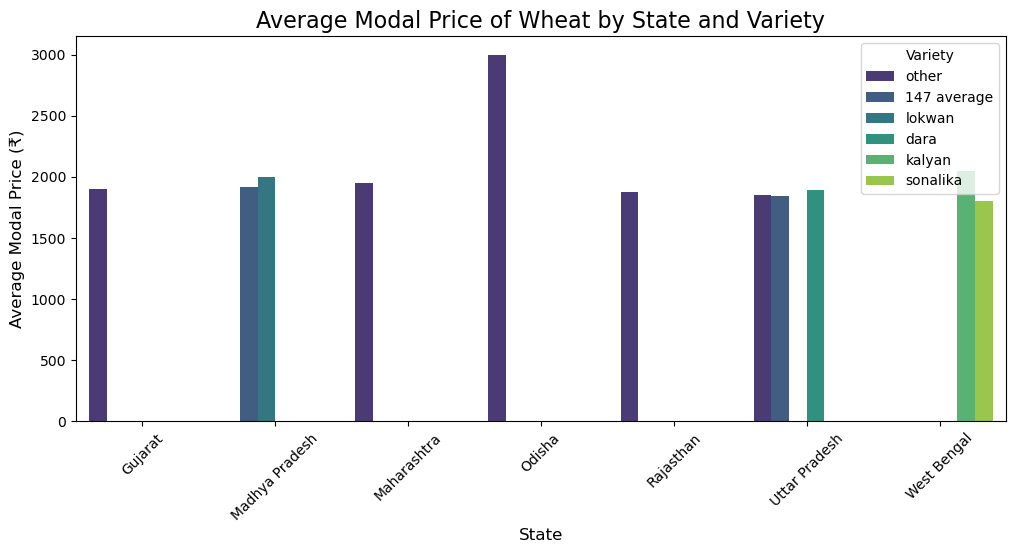

In [57]:
#3. Wheat modal prices in each state
import matplotlib.pyplot as plt
import seaborn as sns

wheat_prices = (
    mandi_data[mandi_data["commodity"].str.lower() == "wheat"]
    .groupby(["state", "variety"])["modal_price"]
    .mean()
    .reset_index()
)

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a vertical bar plot
sns.barplot(x='state', y='modal_price', hue='variety', data=wheat_prices, palette='viridis')

# Title and labels
plt.title('Average Modal Price of Wheat by State and Variety', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Modal Price (₹)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Variety')

# Show the plot
plt.show()



#https://www.commodityonline.com/mandiprices/wheat/maharashtra

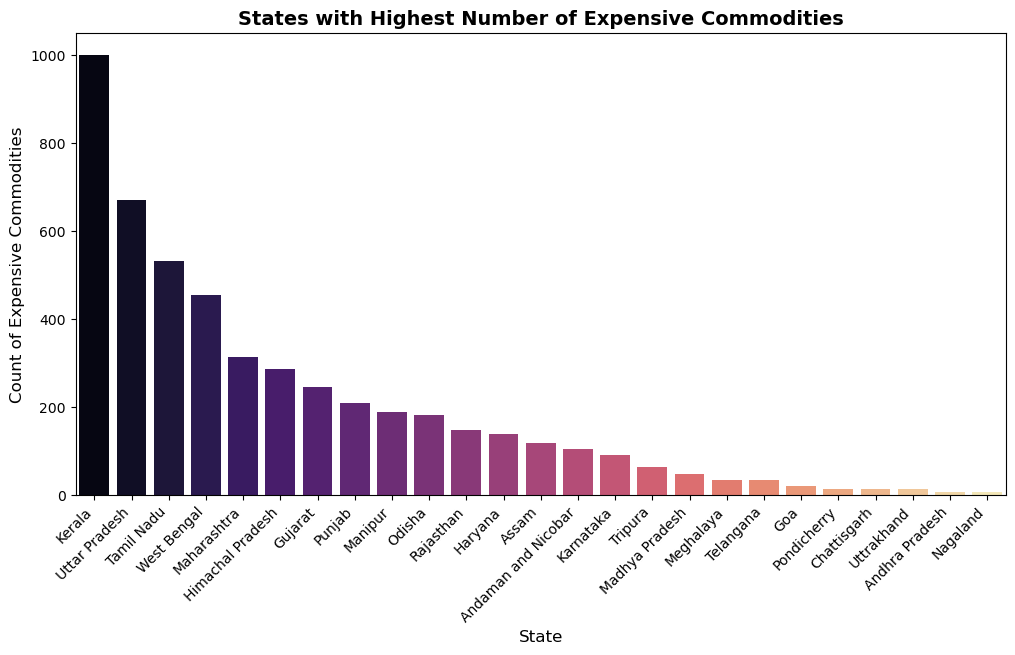

In [59]:
#4.states with most expensive commodities
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the price threshold (top 30% most expensive commodities)
price_threshold = mandi_data["modal_price"].quantile(0.7)

# Filter expensive commodities
expensive_commodities = mandi_data[mandi_data["modal_price"] >= price_threshold]

# Count expensive commodities per state
state_expensive_counts = (
    expensive_commodities["state"].value_counts().reset_index()
)
state_expensive_counts.columns = ["state", "expensive_commodity_count"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="state", 
    y="expensive_commodity_count", 
    hue="state",  # Assign hue to state
    data=state_expensive_counts, 
    palette="magma", 
    legend=False  # Hide the legend
)

# Titles & Labels
plt.title("States with Highest Number of Expensive Commodities", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Count of Expensive Commodities", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

plt.show()


In [61]:
#5. lentils Types & Get Their Prices per State
# Define a list of lentil-related names
lentil_keywords = ["masoor", "toor", "moong", "urad", "chana"]  

# Filter commodities containing lentil-related keywords
lentils_data = mandi_data[
    mandi_data["commodity"].str.contains("|".join(lentil_keywords), case=False, na=False)
]

# Group by state and commodity to get the average modal price
lentils_by_state = lentils_data.groupby(["state", "commodity"])["modal_price"].mean().reset_index()

print(lentils_by_state)



            state                    commodity  modal_price
0           Assam    Green Gram (Moong)(Whole)  6500.000000
1  Madhya Pradesh   Green Gram Dal (Moong Dal)  3650.000000
2         Manipur  Bengal Gram Dal (Chana Dal)  9533.333333
3      Tamil Nadu    Green Gram (Moong)(Whole)  4726.833333
4   Uttar Pradesh  Bengal Gram Dal (Chana Dal)  5430.000000
5   Uttar Pradesh    Green Gram (Moong)(Whole)  5800.000000
6     West Bengal    Green Gram (Moong)(Whole)  7250.000000


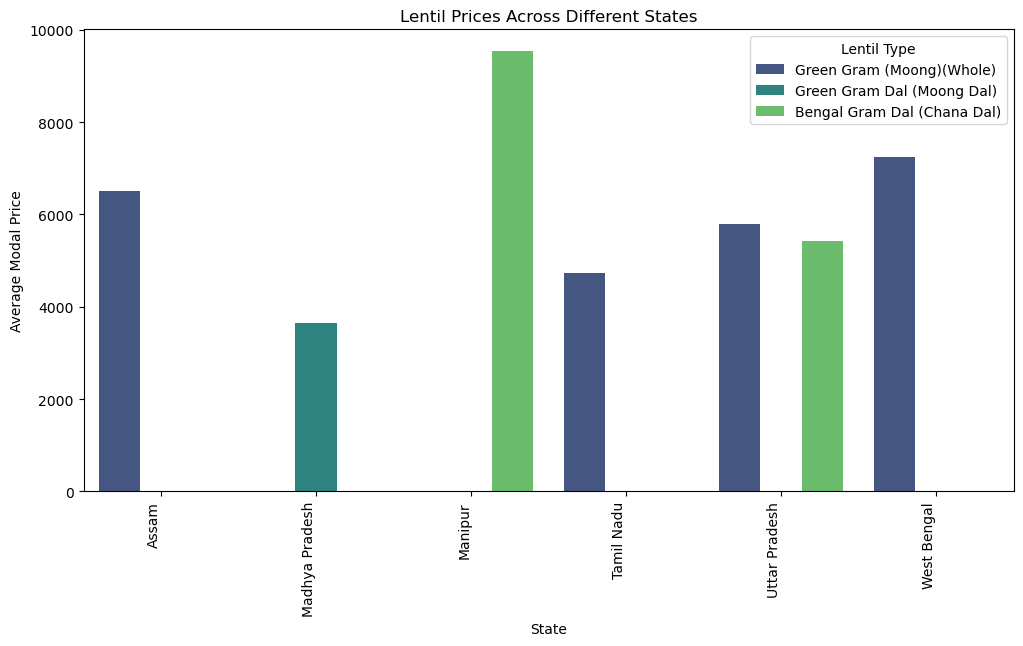

In [63]:
#import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x="state", y="modal_price", hue="commodity", data=lentils_by_state, palette="viridis")

plt.title("Lentil Prices Across Different States")
plt.xlabel("State")
plt.ylabel("Average Modal Price")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Lentil Type")

plt.show()


In [65]:
#6.millets Types & Get Their Prices per State

# Define a list of millet-related names
millet_keywords = ["bajra", "jowar", "ragi", "foxtail", "barnyard", "kodo"]  

# Filter commodities containing millet-related keywords
millets_data = mandi_data[
    mandi_data["commodity"].str.contains("|".join(millet_keywords), case=False, na=False)
]

# Group by state and commodity to get the average modal price
millets_by_state = millets_data.groupby(["state", "commodity"])["modal_price"].mean().reset_index()

print(millets_by_state)


            state                  commodity  modal_price
0  Andhra Pradesh             Jowar(Sorghum)  1900.000000
1         Gujarat  Bajra(Pearl Millet/Cumbu)  1965.000000
2       Rajasthan  Bajra(Pearl Millet/Cumbu)  1776.000000
3      Tamil Nadu             Jowar(Sorghum)  2150.000000
4      Tamil Nadu        Kodo Millet(Varagu)  1989.000000
5      Tamil Nadu       Ragi (Finger Millet)  2304.285714
6   Uttar Pradesh  Bajra(Pearl Millet/Cumbu)  1717.272727
7   Uttar Pradesh             Jowar(Sorghum)  1400.000000


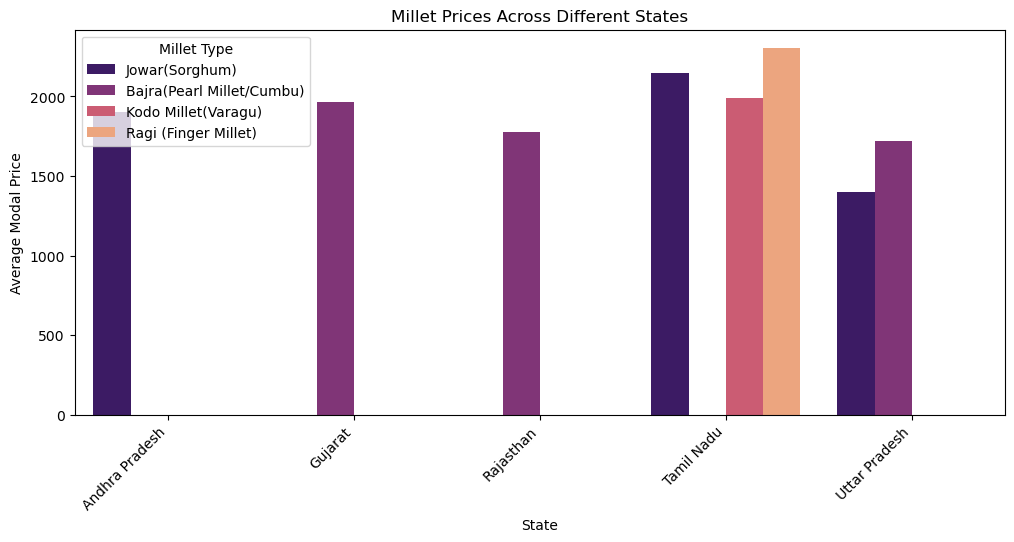

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.barplot(x="state", y="modal_price", hue="commodity", data=millets_by_state, palette="magma")

plt.title("Millet Prices Across Different States")
plt.xlabel("State")
plt.ylabel("Average Modal Price")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Millet Type")

plt.show()


In [69]:
#7.millets and lentils comparison

#Step 1: Define Millet & Lentil Categories

# Define keywords for millets and lentils
millet_keywords = ["bajra", "jowar", "ragi", "foxtail", "barnyard", "little", "kodo"]
lentil_keywords = ["masoor", "toor", "moong", "urad", "chana"]

# Filter millets and lentils separately
millets_data = mandi_data[mandi_data["commodity"].str.contains("|".join(millet_keywords), case=False, na=False)]
lentils_data = mandi_data[mandi_data["commodity"].str.contains("|".join(lentil_keywords), case=False, na=False)]

# Add a category column for comparison
millets_data["category"] = "Millets"
lentils_data["category"] = "Lentils"

# Combine both datasets
comparison_data = pd.concat([millets_data, lentils_data])

#Step 2: Group Data for Comparison
# Group by state and category to calculate the average modal price
comparison_by_state = comparison_data.groupby(["state", "category"])["modal_price"].mean().reset_index()

print(comparison_by_state)



             state category  modal_price
0   Andhra Pradesh  Millets  1900.000000
1            Assam  Lentils  6500.000000
2          Gujarat  Millets  2311.250000
3           Kerala  Millets  4000.000000
4   Madhya Pradesh  Lentils  3650.000000
5      Maharashtra  Millets  2000.000000
6          Manipur  Lentils  9533.333333
7        Rajasthan  Millets  1776.000000
8       Tamil Nadu  Lentils  4726.833333
9       Tamil Nadu  Millets  2252.111111
10   Uttar Pradesh  Lentils  5615.000000
11   Uttar Pradesh  Millets  1690.833333
12     West Bengal  Lentils  7250.000000


C:\Users\srush\AppData\Local\Temp\ipykernel_12044\1146670036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millets_data["category"] = "Millets"
C:\Users\srush\AppData\Local\Temp\ipykernel_12044\1146670036.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lentils_data["category"] = "Lentils"


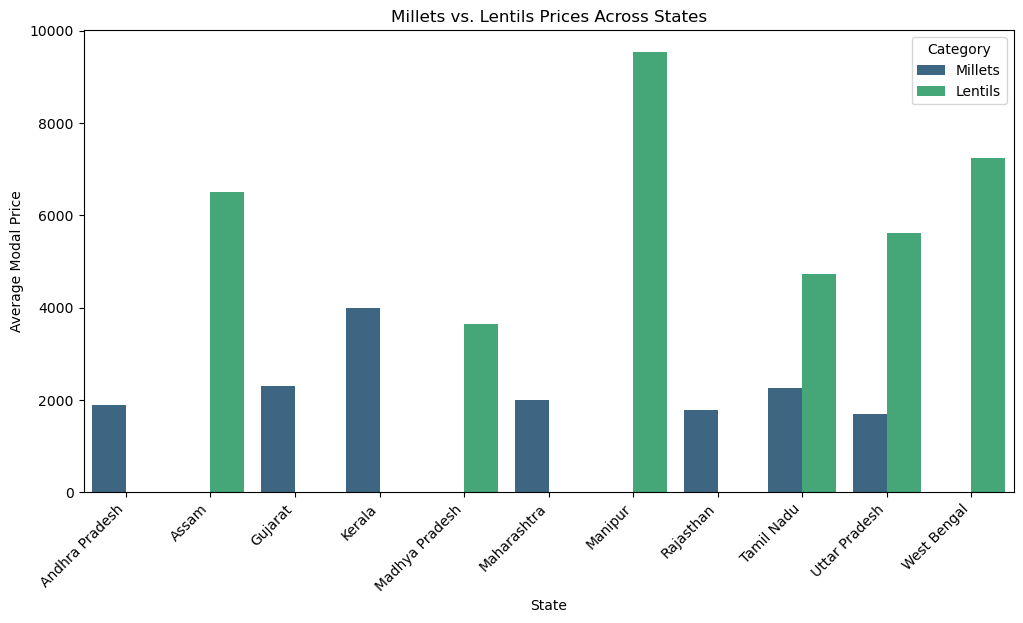

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x="state", y="modal_price", hue="category", data=comparison_by_state, palette="viridis")

plt.title("Millets vs. Lentils Prices Across States")
plt.xlabel("State")
plt.ylabel("Average Modal Price")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")

plt.show()


In [72]:
#8.Top Commodities in maharashtra

# Ensure all strings are in lowercase to avoid case-sensitivity issues
maharashtra_data = mandi_data[mandi_data["state"].str.lower() == "maharashtra"]

# Group by commodity and calculate the average modal price
top_commodities = maharashtra_data.groupby("commodity")["modal_price"].mean().reset_index()

# Sort commodities by modal price (descending) & select top 10
top_commodities = top_commodities.sort_values(by="modal_price", ascending=False).head(10)

# Print to verify
print(top_commodities)


                      commodity  modal_price
0                         Apple       8600.0
37               Pear(Marasebu)       8000.0
21                  Ginger(Dry)       5500.0
16                       Cotton       5275.0
52                     Turmeric       5200.0
24                         Guar       4800.0
31                        Mango       4500.0
1   Arhar (Tur/Red Gram)(Whole)       4430.0
23                 Green Chilli       4000.0
25                        Guava       4000.0


C:\Users\srush\AppData\Local\Temp\ipykernel_12044\2232746448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="commodity", x="modal_price", data=top_commodities, palette="viridis")


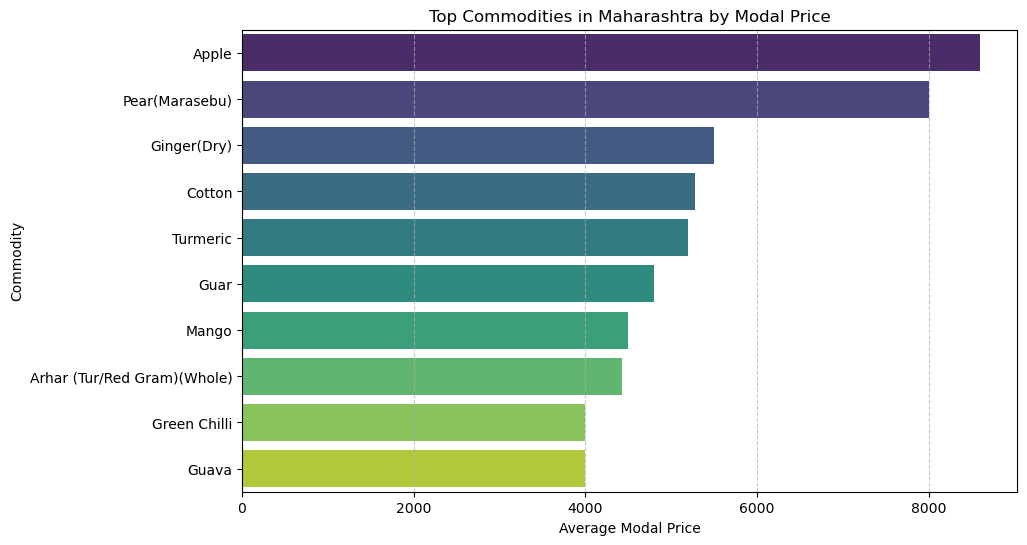

In [75]:
#8.Top Commodities in maharashtra

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y="commodity", x="modal_price", data=top_commodities, palette="viridis")

plt.title("Top Commodities in Maharashtra by Modal Price")
plt.xlabel("Average Modal Price")
plt.ylabel("Commodity")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


In [76]:
#9.Commodities in Kerala 
import matplotlib.pyplot as plt

# Filter data for Maharashtra
maharashtra_data = mandi_data[mandi_data["state"].str.lower() == "kerala"]

# Group by commodity and calculate the average modal price
top_commodities = maharashtra_data.groupby("commodity")["modal_price"].mean().reset_index()

# Sort commodities by modal price (descending) & select top 10
top_commodities = top_commodities.sort_values(by="modal_price", ascending=False).head(10)

# Print to verify
print(top_commodities)


                    commodity   modal_price
43             Pepper garbled  30125.000000
11               Black pepper  29250.000000
4   Arecanut(Betelnut/Supari)  21000.000000
21                Coconut Oil  18150.000000
47                     Rubber  12350.000000
3                       Apple  11000.000000
24                      Copra  10216.666667
17                 Cashewnuts  10100.000000
32              Ginger(Green)   7666.666667
15                   Capsicum   7100.000000


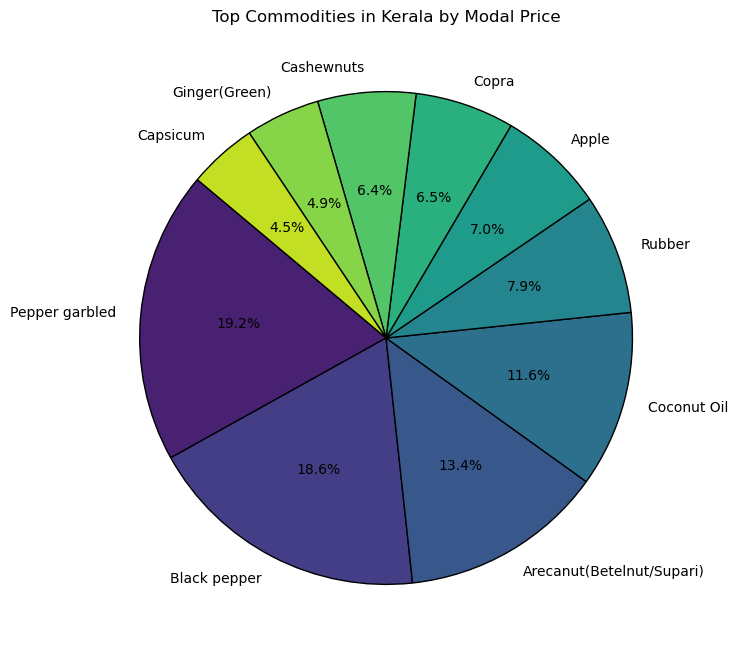

In [79]:
# Define a color palette
colors = sns.color_palette("viridis", len(top_commodities))

plt.figure(figsize=(8, 8))
plt.pie(
    top_commodities["modal_price"], 
    labels=top_commodities["commodity"], 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Top Commodities in Kerala by Modal Price")
plt.show()



In [81]:
#10.Top 10 markets in Maharashtra with commodities.

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Maharashtra
maharashtra_data = mandi_data[mandi_data["state"].str.lower() == "maharashtra"]

# Count the number of commodities available in each market
market_counts = maharashtra_data["market"].value_counts().reset_index()
market_counts.columns = ["market", "commodity_count"]

# Select the Top 10 markets
top_markets = market_counts.head(10)

# Print to verify
print(top_markets)


               market  commodity_count
0                PUNE              308
1               KARAD              210
2      PUNE(HADAPSAR)              154
3        PUNE(PIMPRI)               91
4            KOLHAPUR               70
5       PUNE(KHADIKI)               70
6        MANGAL WEDHA               63
7               YAWAL               35
8  KOLHAPUR(MALKAPUR)               28
9              SAVNER               28


C:\Users\srush\AppData\Local\Temp\ipykernel_12044\1774689672.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="market", x="commodity_count", data=top_markets, palette=colors)


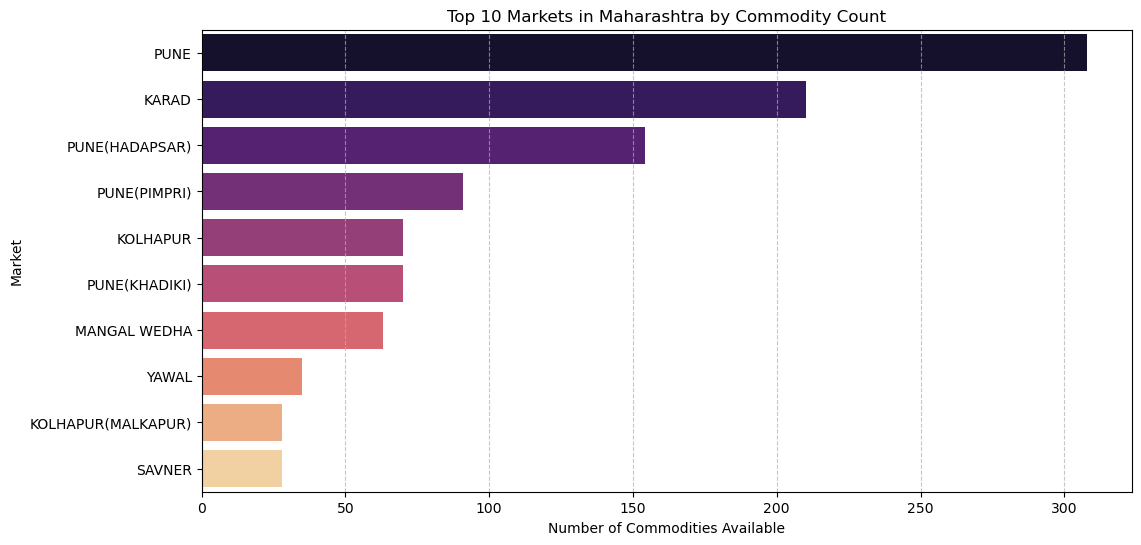

In [83]:
# Define a color palette
colors = sns.color_palette("magma", len(top_markets))

plt.figure(figsize=(12, 6))
sns.barplot(y="market", x="commodity_count", data=top_markets, palette=colors)

plt.title("Top 10 Markets in Maharashtra by Commodity Count")
plt.xlabel("Number of Commodities Available")
plt.ylabel("Market")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


In [85]:
#Onion Markets With variety across all states


# Ensure all commodity names are in lowercase to avoid case mismatches
mandi_data["commodity"] = mandi_data["commodity"].str.lower()

# Filter the dataset for Onion
onion_data = mandi_data[mandi_data["commodity"] == "onion"]

# Display first few rows
print(onion_data.head())


                   state          district           market commodity variety  \
13   Andaman and Nicobar     South Andaman       PORT BLAIR     onion   other   
52                 Assam            Jorhat           JORHAT     onion   onion   
64                 Assam            Kamrup  PAMOHI(GARCHUK)     onion   onion   
185              Gujarat  Vadodara(Baroda)            PADRA     onion   other   
236              Haryana           Gurgaon          PATAUDI     onion   other   

    arrival_date  min_price  max_price  modal_price  
13    2019-04-03     2000.0     3500.0       3000.0  
52    2019-04-03     1150.0     1250.0       1200.0  
64    2019-04-03      950.0     1150.0       1100.0  
185   2019-04-03      500.0      700.0        600.0  
236   2019-04-03      800.0     1200.0       1000.0  


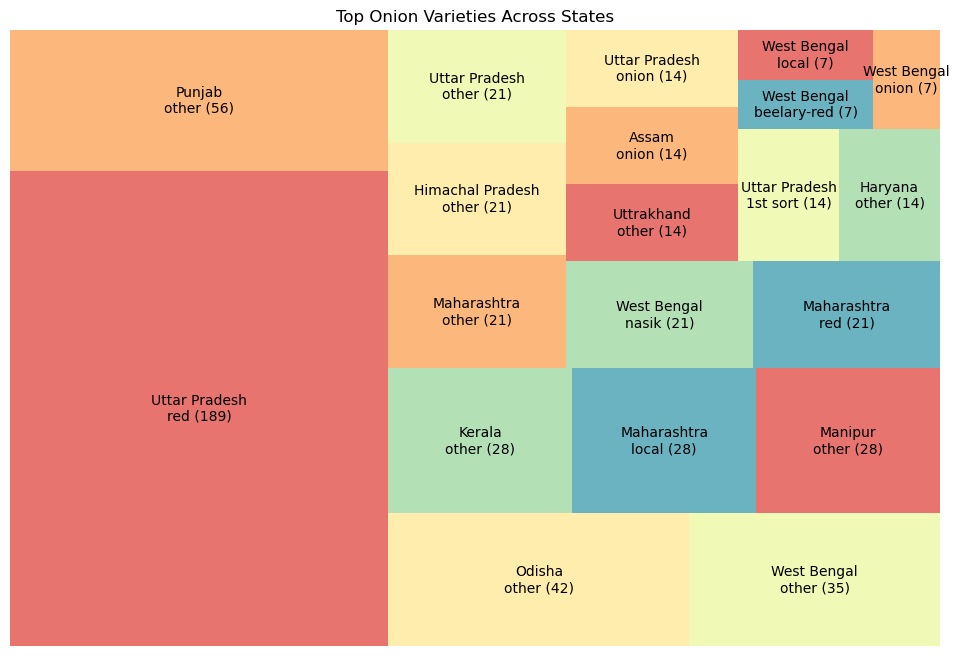

In [122]:
import squarify

# Count occurrences of each (state, variety) combination
onion_varieties = onion_data.groupby(["state", "variety"]).size().reset_index(name="count")

# Sort and select top entries
top_onion_varieties = onion_varieties.sort_values(by="count", ascending=False).head(20)

# Define labels
labels = [f"{row['state']}\n{row['variety']} ({row['count']})" for _, row in top_onion_varieties.iterrows()]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_onion_varieties["count"], label=labels, alpha=0.8, color=sns.color_palette("Spectral"))

plt.axis("off")
plt.title("Top Onion Varieties Across States")
plt.show()


In [ ]:
#Conclusion:

Seasonal Impact: 
Prices fluctuate based on arrival date, showing seasonal price variations for different commodities.
Commodity-Specific Trends: 
                Certain commodities have consistently high modal prices, indicating high demand or lower supply.
Regional Price Differences: 
                Prices vary significantly across states and districts, suggesting differences in demand-supply balance and transportation costs
Top Performing Markets: 
                 Some markets consistently show higher prices, indicating premium quality or strong demand.
State & District-wise Comparisons: 
                 Certain states/districts have lower price volatility, making them more stable for trade.
High Arrival vs. Low Prices: 
                 A higher arrival volume often leads to lower modal prices due to increased supply.
Market Interventions: 
                Government price support or subsidies impact certain commodities, stabilizing prices in some states.
Best Selling Time: 
                Traders can optimize selling strategies by identifying peak price periods for specific commodities.